In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
#taking continues value
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

## Problem statements

>2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [6]:
df = pd.read_csv("C:\\Users\\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A4 Simple Linear Regression\\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


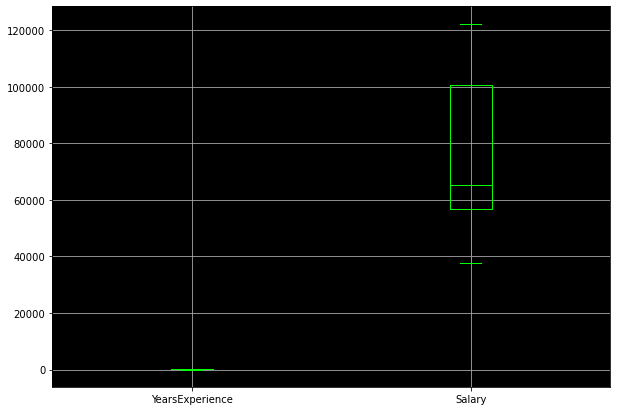

In [9]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
df.boxplot(color = "lime" )
plt.show()

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


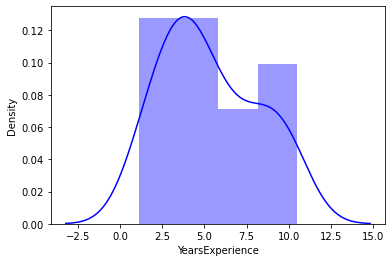

In [11]:
sns.distplot(df["YearsExperience"], kde=True, color = "blue")
plt.show()

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


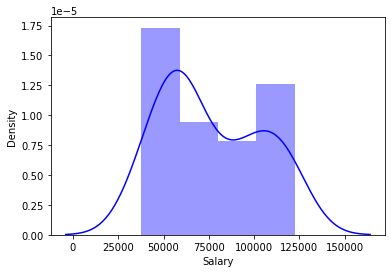

In [13]:
sns.distplot(df["Salary"], kde=True, color = "blue")
plt.show()

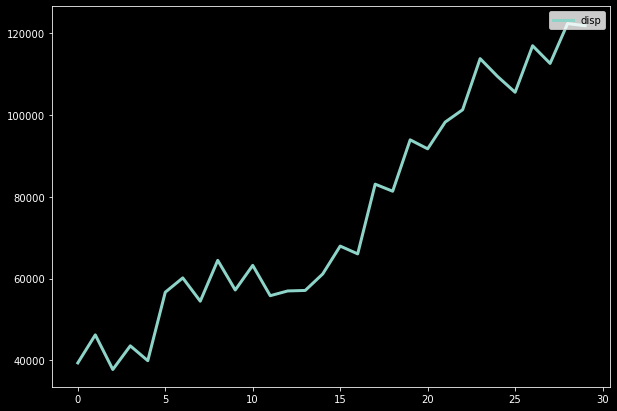

In [17]:
plt.figure(figsize=(10,7), facecolor='black')
with plt.style.context('dark_background'):
  plt.plot(df["Salary"] , label = "disp" , linewidth =3)
plt.legend(loc='upper right')
plt.show()

In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [18]:
x = df["YearsExperience"]
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [20]:
y = df["Salary"]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

# **Hypothesis testing**

>*   H0 : Model is insignificant.
>*   H1 : Model is significant

>*   H0 : Regression Coefficients are insignificant.
>*   H1 : Regression Coefficients are significant.




# 1. Without any Transformation

In [21]:
model1 = smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        00:41:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


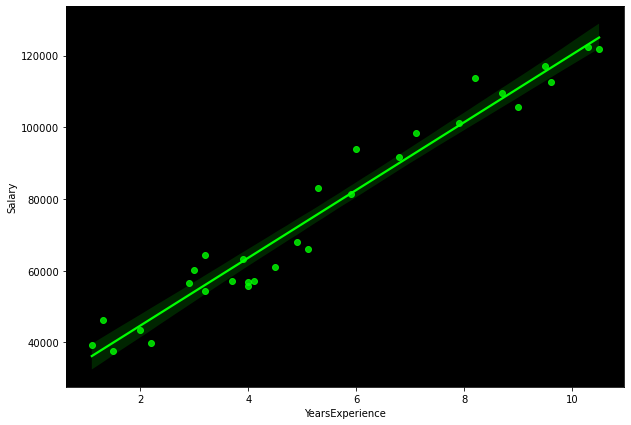

In [22]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x , y , data=df ,color = "lime" );
plt.show()

## 2.Lin-Log transformation

In [23]:
x_log=np.log(x)

In [24]:
model2 = smf.ols("y~x_log",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        00:41:25   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
x_log       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


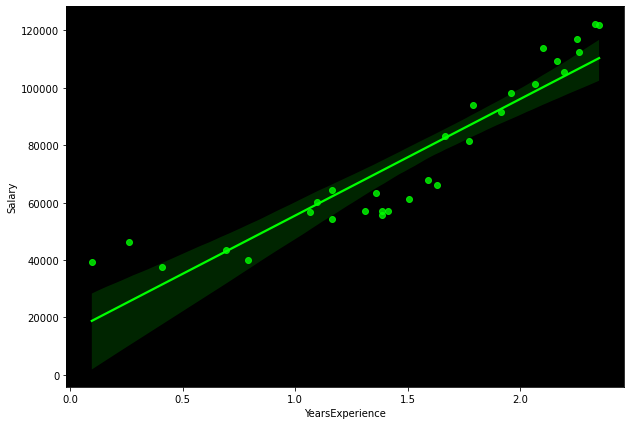

In [25]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_log , y , data=df ,color = "lime" );
plt.show()

## 3. Log-Lin transformation

In [26]:
y_log=np.log(y)

In [27]:
model3 = smf.ols("y_log~x",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        00:41:26   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
x              0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


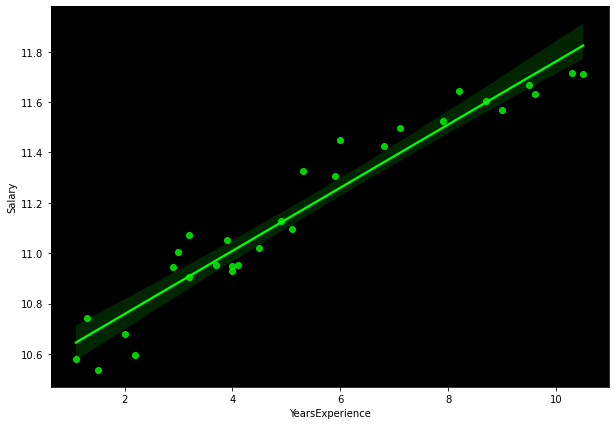

In [28]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x , y_log , data=df ,color = "lime" );
plt.show()

## 4. Log-Log transformation

In [29]:
y_log=np.log(y)
x_log=np.log(x)

In [30]:
model4 = smf.ols("y_log~x_log",data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.40e-16
Time:                        00:41:26   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
x_log          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


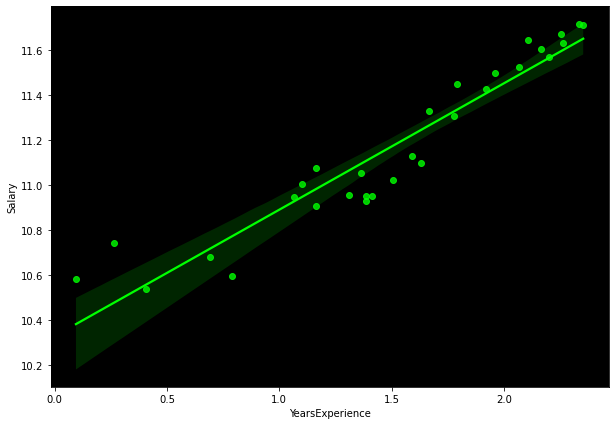

In [31]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_log , y_log , data=df ,color = "lime" );
plt.show()

## 5. Square-root transformation of X

In [32]:
x_sqrt = np.sqrt(x)

In [33]:
model5 = smf.ols("y~x_sqrt",data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           8.57e-18
Time:                        00:41:26   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
x_sqrt       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


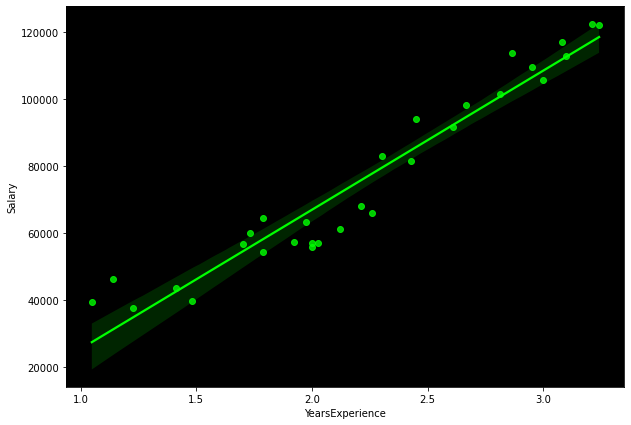

In [34]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_sqrt , y , data=df ,color = "lime" );
plt.show()

## 6. Square-root transformation of Y

In [35]:
y_sqrt = np.sqrt(y)

In [36]:
model6 = smf.ols("y_sqrt~x",data=df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           9.78e-20
Time:                        00:41:27   Log-Likelihood:                -114.33
No. Observations:                  30   AIC:                             232.7
Df Residuals:                      28   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    180.7002      4.446     40.646      0.000     171.594     189.807
x             17.0565      0.741     23.025      0.000      15.539      18.574
==============================================================================
Omnibus:                        2.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.906
Skew:                           0.439   Prob(JB):                        0.386
Kurtosis:                       2.131   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


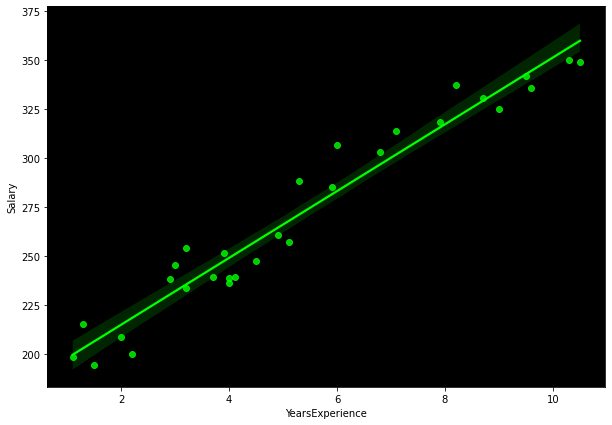

In [37]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x , y_sqrt , data=df ,color = "lime" );
plt.show()

## 7. Square-root transformation of X and Y

In [38]:
x_sqrt = np.sqrt(x)
y_sqrt = np.sqrt(y)

In [39]:
model7 = smf.ols("y_sqrt~x_sqrt",data=df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.58e-19
Time:                        00:41:27   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
x_sqrt        75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


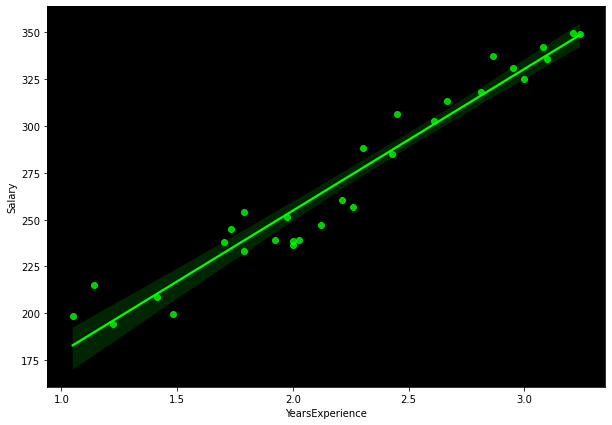

In [40]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_sqrt , y_sqrt , data=df ,color = "lime" );
plt.show()

##  8.inverse model

In [41]:
x_inv=1/x

In [42]:
model8 = smf.ols("y~x_inv",data=df).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.58e-07
Time:                        00:41:27   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
x_inv      -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


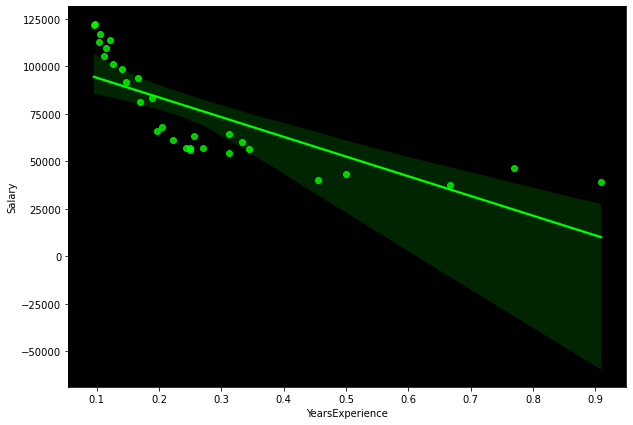

In [43]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_inv , y , data=df ,color = "lime" );
plt.show()

## 9. S-curve model

In [44]:
x_inv=1/x
y_log=np.log(y)

In [45]:
model9 = smf.ols("y_log~x_inv",data=df).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     61.60
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.50e-08
Time:                        00:41:28   Log-Likelihood:                 5.3140
No. Observations:                  30   AIC:                            -6.628
Df Residuals:                      28   BIC:                            -3.826
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5850      0.065    178.556      0.000      11.452      11.718
x_inv         -1.5065      0.192     -7.849      0.000      -1.900      -1.113
==============================================================================
Omnibus:                        8.949   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.329
Skew:                           0.141   Prob(JB):                        0.312
Kurtosis:                       1.665   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


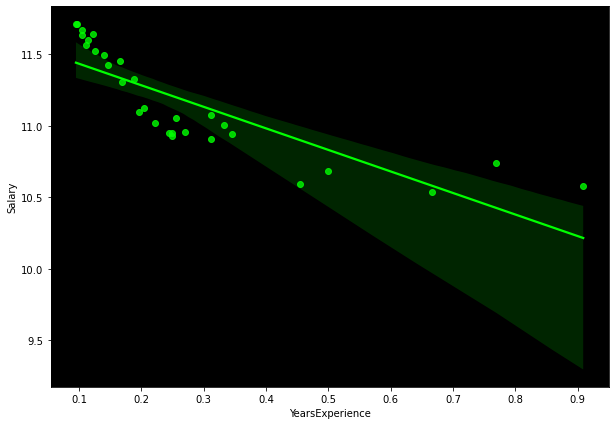

In [46]:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x_inv , y_log , data=df ,color = "lime" );
plt.show()

In [61]:
#t and p-value
print(model1.tvalues, '\n', model1.pvalues)

Intercept    11.346940
x            24.950094
dtype: float64 
 Intercept    5.511950e-12
x            1.143068e-20
dtype: float64


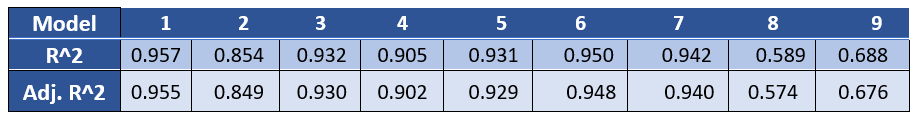

> **We will use Model 1 of without any transformation because of high R-square and Adjusted R-square value**


*   Here p-value is less than 0.05 at 5% level of significance so we may reject the null hypothesis and may conclude that model is significant.

-----

*   Here p-value is less than 0.05 at 5% level of significance so we may reject the null hypothesis and may conclude that regression coefficient are significant.

In [57]:
#Coefficients
model1.params

Intercept    25792.200199
x             9449.962321
dtype: float64

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


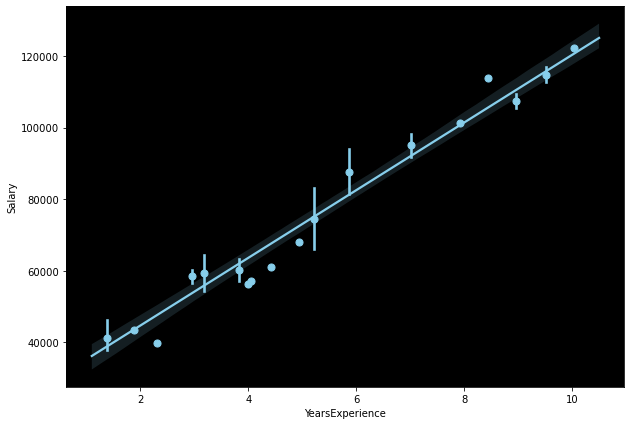

In [58]:
#residual plots:
plt.figure(figsize =(10,7))
plt.axes(facecolor='black')
sns.regplot(x , y, x_bins=20, data=df , color = "skyblue")
plt.show()

In [59]:
model1.rsquared

0.9569566641435086

In [62]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

> here, the model explains 95% of the variation in dependent variable.

<bold>
<div align="center" style="color:white;
           background-color:#800000;
           font-size:50px;
           font-family:Verdana;
           letter-spacing:1px"> 
    <p style="padding: 10px;color:white;">
     </p>
    
   <center>
       ⪻   Thank You   ⪼   
    </center>  
       </div>
</bold>